In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0, regex = True).astype(float)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
a = df._get_numeric_data().drop("SeniorCitizen", axis = 1)

a

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [9]:
a.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [10]:
b = scale(a)
c = pd.DataFrame(b, columns = a.columns)
c

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.992611
1,0.066327,-0.259629,-0.172165
2,-1.236724,-0.362660,-0.958066
3,0.514251,-0.746535,-0.193672
4,-1.236724,0.197365,-0.938874
...,...,...,...
7038,-0.340876,0.665992,-0.127605
7039,1.613701,1.277533,2.242606
7040,-0.870241,-1.168632,-0.852932
7041,-1.155283,0.320338,-0.870513


In [11]:
df = df.join(c, lsuffix = "_" )

In [12]:
df = df.drop(["customerID","TotalCharges_", "tenure_", "MonthlyCharges_"], axis =1)

In [13]:
df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,-1.277445,-1.160323,-0.992611
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0.066327,-0.259629,-0.172165
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,-1.236724,-0.362660,-0.958066
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0.514251,-0.746535,-0.193672
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,-1.236724,0.197365,-0.938874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No,-0.340876,0.665992,-0.127605
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No,1.613701,1.277533,2.242606
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,-0.870241,-1.168632,-0.852932
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,-1.155283,0.320338,-0.870513


In [14]:
for i in a:
    for j in df["Churn"].unique():
        

        Q1 = df[df["Churn"]== j][i].quantile(0.25)
        Q3 = df[df["Churn"]== j][i].quantile(0.75)
        IQR = Q3-Q1
        lower_lim = Q1-1.5*IQR
        upper_lim = Q3+1.5*IQR
        print(f" count of outlier {i} Churn {j}  = {df[df['Churn']==j][(df[df['Churn']==j][i] < lower_lim) | (df[df['Churn']==j][i] > upper_lim)][i].count()} ")

 count of outlier tenure Churn No  = 0 
 count of outlier tenure Churn Yes  = 23 
 count of outlier MonthlyCharges Churn No  = 0 
 count of outlier MonthlyCharges Churn Yes  = 0 
 count of outlier TotalCharges Churn No  = 0 
 count of outlier TotalCharges Churn Yes  = 109 


In [15]:
X = df.drop(["Churn"], axis =1)
y = df["Churn"].replace({"Yes":1, "No" :0}, regex = True)

In [16]:
X.sample(50)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
4608,Male,0,No,No,Yes,Yes,DSL,No,No,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),0.921455,0.433340,0.901608
6635,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,-0.340876,-1.484373,-0.770232
577,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,-0.951682,0.190718,-0.741997
4885,Male,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),1.613701,1.558377,2.533765
566,Male,0,Yes,Yes,Yes,No,Fiber optic,Yes,No,No,Yes,Yes,Yes,One year,No,Electronic check,-0.707359,1.234327,-0.270218
4568,Male,0,No,No,Yes,No,Fiber optic,No,Yes,Yes,Yes,No,No,One year,Yes,Electronic check,-0.259435,0.679286,-0.041972
5846,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,-1.196004,0.376839,-0.892131
4181,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1.206498,1.216047,1.713981
1978,Female,0,No,No,Yes,No,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,1.002896,0.165791,0.712363
5668,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0.269929,1.212723,0.736518


In [17]:
X = pd.get_dummies(X)

In [18]:
X = pd.DataFrame(X, columns = X.columns)

In [19]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.992611,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0.066327,-0.259629,-0.172165,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.958066,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0.514251,-0.746535,-0.193672,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,-1.236724,0.197365,-0.938874,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.340876,0.665992,-0.127605,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,1.613701,1.277533,2.242606,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,-0.870241,-1.168632,-0.852932,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,-1.155283,0.320338,-0.870513,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [3]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, stratify=y, random_state=42)

## Random Forest Modeling ##

In [22]:
rf = RandomForestClassifier()

In [23]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [24]:
y_pred = rf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[687,  90],
       [141, 139]], dtype=int64)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       777
           1       0.61      0.50      0.55       280

    accuracy                           0.78      1057
   macro avg       0.72      0.69      0.70      1057
weighted avg       0.77      0.78      0.77      1057



## Random Forest Modeling Scaling ##

In [27]:
rf = RandomForestClassifier()
rf_params = {"n_estimators" : [50, 100, 300],
             "max_depth" : [9, 11, 13],
             "max_features" : [2,4,6,8],
             "min_samples_split" : [2,4,6]
}

In [28]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.7min finished


In [31]:
rf_cv_model.best_params_

{'max_depth': 9,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [26]:
rf_tuned = RandomForestClassifier(max_depth = 9,
                                  max_features = 4,
                                  min_samples_split = 2,
                                  n_estimators = 100).fit(X_train, y_train)

In [27]:
y_pred = rf_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[708,  69],
       [135, 145]], dtype=int64)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       777
           1       0.68      0.52      0.59       280

    accuracy                           0.81      1057
   macro avg       0.76      0.71      0.73      1057
weighted avg       0.80      0.81      0.80      1057



## XGBoost Modeling ##

In [4]:
from xgboost import XGBClassifier


In [30]:
xgb_model = XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       777
           1       0.68      0.54      0.60       280

    accuracy                           0.81      1057
   macro avg       0.76      0.72      0.74      1057
weighted avg       0.80      0.81      0.80      1057



## XGBoost Modeling Scaling ##

In [179]:
xgb = XGBClassifier()
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

In [180]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 5,
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  2.0min finished


In [184]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}

In [31]:
xgb_tuned = XGBClassifier(learning_rate= 0.1,
                                max_depth= 3,
                                n_estimators= 100,
                                subsample= 0.5).fit(X_train, y_train)

In [32]:
y_pred = xgb_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[706,  71],
       [136, 144]], dtype=int64)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       777
           1       0.67      0.51      0.58       280

    accuracy                           0.80      1057
   macro avg       0.75      0.71      0.73      1057
weighted avg       0.79      0.80      0.80      1057



## SMOTE ##

In [34]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
os = SMOTE(random_state=42)
os_data_X,os_data_y=os.fit_sample(X_train,y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=X.columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=["Churn"])

In [35]:
os_data_X.shape

(8794, 45)

## Smote Random Forest ##

In [36]:
rf_os = RandomForestClassifier().fit(os_data_X, os_data_y)

In [37]:
y_pred = rf_os.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[643, 134],
       [113, 167]], dtype=int64)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       777
           1       0.55      0.60      0.57       280

    accuracy                           0.77      1057
   macro avg       0.70      0.71      0.71      1057
weighted avg       0.77      0.77      0.77      1057



## Smote Random Forest Scaling ##

In [71]:
rf = RandomForestClassifier()
rf_params = {"n_estimators" : [50, 100, 300],
             "max_depth" : [3,5,7],
             "max_features" : [2,4,6,8],
             "min_samples_split" : [2,4,6]
}

In [72]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(os_data_X, os_data_y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.6min finished


In [73]:
rf_cv_model.best_params_

{'max_depth': 7,
 'max_features': 8,
 'min_samples_split': 6,
 'n_estimators': 100}

In [39]:
rf_tuned = RandomForestClassifier(max_depth = 7,
                                  max_features = 8,
                                  min_samples_split = 6,
                                  n_estimators = 100).fit(os_data_X, os_data_y)

In [40]:
y_pred = rf_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[579, 198],
       [ 59, 221]], dtype=int64)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82       777
           1       0.53      0.79      0.63       280

    accuracy                           0.76      1057
   macro avg       0.72      0.77      0.73      1057
weighted avg       0.81      0.76      0.77      1057



## Smote XGBoost Forest ##

In [42]:
xgb_os = XGBClassifier().fit(os_data_X, os_data_y)
y_pred = xgb_os.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[612 165]
 [ 74 206]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       777
           1       0.56      0.74      0.63       280

    accuracy                           0.77      1057
   macro avg       0.72      0.76      0.73      1057
weighted avg       0.80      0.77      0.78      1057



In [78]:
xgb = XGBClassifier()
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 5,
                            n_jobs = -1, verbose = 2).fit(os_data_X, os_data_y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  3.3min finished


In [79]:
xgb_cv_model.best_params_

{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1}

In [48]:
xgb_tuned = XGBClassifier(learning_rate= 0.3,
                                max_depth= 7,
                                n_estimators= 300,
                                subsample= 1).fit(os_data_X, os_data_y)

In [49]:
y_pred = xgb_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[656, 121],
       [122, 158]], dtype=int64)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       777
           1       0.57      0.56      0.57       280

    accuracy                           0.77      1057
   macro avg       0.70      0.70      0.70      1057
weighted avg       0.77      0.77      0.77      1057



## Smote Logistic Regression ##

In [51]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(os_data_X, os_data_y)

LogisticRegression()

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = classifier.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[641, 136],
       [ 92, 188]], dtype=int64)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       777
           1       0.58      0.67      0.62       280

    accuracy                           0.78      1057
   macro avg       0.73      0.75      0.74      1057
weighted avg       0.80      0.78      0.79      1057



## Smote Logistic Regression Scaling ##

In [61]:
classifier = LogisticRegression(C = 100,random_state = 42, max_iter=20)
classifier.fit(os_data_X, os_data_y)
y_pred = classifier.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[622, 155],
       [ 77, 203]], dtype=int64)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       777
           1       0.57      0.72      0.64       280

    accuracy                           0.78      1057
   macro avg       0.73      0.76      0.74      1057
weighted avg       0.80      0.78      0.79      1057



** for churn yes, The best model is logistic Regression **

In [63]:
import pickle
pickle.dump(classifier, open('logistic_model', 'wb'))

In [64]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

In [65]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,-1.277445,-1.160323,-0.992611
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0.066327,-0.259629,-0.172165
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,-1.236724,-0.362660,-0.958066
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0.514251,-0.746535,-0.193672
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,-1.236724,0.197365,-0.938874


Fitting estimator with 45 features.
Fitting estimator with 35 features.
Fitting estimator with 25 features.


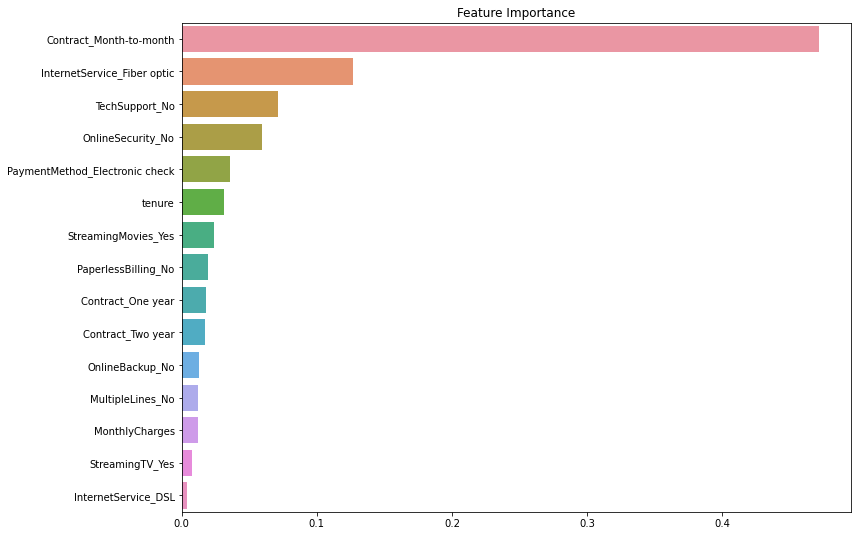

In [68]:
from sklearn.feature_selection import RFE
selector = RFE(xgb_model, n_features_to_select=15, step=10,verbose=2  )
selector = selector.fit(X, y)
selector.support_

features = []
for i in list(enumerate(selector.support_.tolist())):
    if i[1] == True:
        features.append(i[0])
features
X.columns[features]

feature_imp = pd.Series(xgb_model.feature_importances_[features],
                        index=X_train.columns[features]).sort_values(ascending=False)
plt.figure(figsize=(12,9))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

In [5]:
df2 = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df2["TotalCharges"] = df2["TotalCharges"].replace(" ", 0, regex = True).astype(float)

In [8]:
df2 = df2[['tenure', 'OnlineSecurity', 'Contract', 'TotalCharges', 'InternetService','TechSupport', 'MonthlyCharges',  'Churn']]

In [9]:
df3 = df2[['tenure', 'OnlineSecurity', 'Contract', 'TotalCharges', 'InternetService','TechSupport', 'MonthlyCharges']]
df3

,tenure,OnlineSecurity,Contract,TotalCharges,InternetService,TechSupport,MonthlyCharges
0,1,No,Month-to-month,29.85,DSL,No,29.85
1,34,Yes,One year,1889.50,DSL,No,56.95
2,2,Yes,Month-to-month,108.15,DSL,No,53.85
3,45,Yes,One year,1840.75,DSL,Yes,42.30
4,2,No,Month-to-month,151.65,Fiber optic,No,70.70
...,...,...,...,...,...,...,...
7038,24,Yes,One year,1990.50,DSL,Yes,84.80
7039,72,No,One year,7362.90,Fiber optic,No,103.20
7040,11,Yes,Month-to-month,346.45,DSL,No,29.60
7041,4,No,Month-to-month,306.60,Fiber optic,No,74.40


In [10]:
import pickle
pickle.dump(df3, open("Telco.pkl", "wb"))

In [11]:
df4 = pickle.load(open("Telco.pkl", "rb"))
df4

,tenure,OnlineSecurity,Contract,TotalCharges,InternetService,TechSupport,MonthlyCharges
0,1,No,Month-to-month,29.85,DSL,No,29.85
1,34,Yes,One year,1889.50,DSL,No,56.95
2,2,Yes,Month-to-month,108.15,DSL,No,53.85
3,45,Yes,One year,1840.75,DSL,Yes,42.30
4,2,No,Month-to-month,151.65,Fiber optic,No,70.70
...,...,...,...,...,...,...,...
7038,24,Yes,One year,1990.50,DSL,Yes,84.80
7039,72,No,One year,7362.90,Fiber optic,No,103.20
7040,11,Yes,Month-to-month,346.45,DSL,No,29.60
7041,4,No,Month-to-month,306.60,Fiber optic,No,74.40


In [12]:
df4._get_numeric_data()

,tenure,TotalCharges,MonthlyCharges
0,1,29.85,29.85
1,34,1889.50,56.95
2,2,108.15,53.85
3,45,1840.75,42.30
4,2,151.65,70.70
...,...,...,...
7038,24,1990.50,84.80
7039,72,7362.90,103.20
7040,11,346.45,29.60
7041,4,306.60,74.40


In [13]:
a = df2._get_numeric_data()

a

,tenure,TotalCharges,MonthlyCharges
0,1,29.85,29.85
1,34,1889.50,56.95
2,2,108.15,53.85
3,45,1840.75,42.30
4,2,151.65,70.70
...,...,...,...
7038,24,1990.50,84.80
7039,72,7362.90,103.20
7040,11,346.45,29.60
7041,4,306.60,74.40


In [14]:
b = scale(a)
c = pd.DataFrame(b, columns = a.columns)
c

,tenure,TotalCharges,MonthlyCharges
0,-1.277445,-0.992611,-1.160323
1,0.066327,-0.172165,-0.259629
2,-1.236724,-0.958066,-0.362660
3,0.514251,-0.193672,-0.746535
4,-1.236724,-0.938874,0.197365
...,...,...,...
7038,-0.340876,-0.127605,0.665992
7039,1.613701,2.242606,1.277533
7040,-0.870241,-0.852932,-1.168632
7041,-1.155283,-0.870513,0.320338


In [15]:
df2 = df2.join(c, lsuffix = "_" )

In [16]:
df2

,tenure_,OnlineSecurity,Contract,TotalCharges_,InternetService,TechSupport,MonthlyCharges_,Churn,tenure,TotalCharges,MonthlyCharges
0,1,No,Month-to-month,29.85,DSL,No,29.85,No,-1.277445,-0.992611,-1.160323
1,34,Yes,One year,1889.50,DSL,No,56.95,No,0.066327,-0.172165,-0.259629
2,2,Yes,Month-to-month,108.15,DSL,No,53.85,Yes,-1.236724,-0.958066,-0.362660
3,45,Yes,One year,1840.75,DSL,Yes,42.30,No,0.514251,-0.193672,-0.746535
4,2,No,Month-to-month,151.65,Fiber optic,No,70.70,Yes,-1.236724,-0.938874,0.197365
...,...,...,...,...,...,...,...,...,...,...,...
7038,24,Yes,One year,1990.50,DSL,Yes,84.80,No,-0.340876,-0.127605,0.665992
7039,72,No,One year,7362.90,Fiber optic,No,103.20,No,1.613701,2.242606,1.277533
7040,11,Yes,Month-to-month,346.45,DSL,No,29.60,No,-0.870241,-0.852932,-1.168632
7041,4,No,Month-to-month,306.60,Fiber optic,No,74.40,Yes,-1.155283,-0.870513,0.320338


In [17]:
df2 = df2.drop(["TotalCharges_", "tenure_", "MonthlyCharges_"], axis =1)
df2

,OnlineSecurity,Contract,InternetService,TechSupport,Churn,tenure,TotalCharges,MonthlyCharges
0,No,Month-to-month,DSL,No,No,-1.277445,-0.992611,-1.160323
1,Yes,One year,DSL,No,No,0.066327,-0.172165,-0.259629
2,Yes,Month-to-month,DSL,No,Yes,-1.236724,-0.958066,-0.362660
3,Yes,One year,DSL,Yes,No,0.514251,-0.193672,-0.746535
4,No,Month-to-month,Fiber optic,No,Yes,-1.236724,-0.938874,0.197365
...,...,...,...,...,...,...,...,...
7038,Yes,One year,DSL,Yes,No,-0.340876,-0.127605,0.665992
7039,No,One year,Fiber optic,No,No,1.613701,2.242606,1.277533
7040,Yes,Month-to-month,DSL,No,No,-0.870241,-0.852932,-1.168632
7041,No,Month-to-month,Fiber optic,No,Yes,-1.155283,-0.870513,0.320338


In [18]:
for i in df2:
    print(df2[i].unique())

['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['No' 'Yes']
[-1.27744458  0.06632742 -1.23672422  0.51425142 -0.99240204 -0.42231695
 -0.91096131 -0.17799476  1.2064976  -0.78880022 -0.66663913  1.04361615
  0.67713287 -0.30015585  1.49154015  0.79929397  1.57298088 -0.46303731
 -0.82952058 -0.09655404  0.59569215  1.61370124 -0.62591876 -0.21871513
 -1.11456313  0.55497178 -0.87024095  1.53226051  1.24721797  0.43281069
 -0.70735949  1.12505688 -0.5851984   1.36937906 -0.95168167 -1.19600386
 -0.05583367  0.71785324  1.28793833  0.96217542 -1.0331224   0.39209033
  0.10704778  0.63641251 -0.1372744   1.32865869  0.22920887  1.45081979
 -0.01511331  0.92145506  0.18848851  0.14776815  0.35136997 -1.07384277
 -1.15528349  0.02560706  1.41009942 -0.38159658  1.00289578  1.16577724
 -0.74807986 -0.50375767  0.84001433  0.3106496   1.08433651 -0.34087622
  0.47353106 -0.54447804  0.88073469  0.758573

In [19]:
X = df2.drop(["Churn"], axis =1)
y = df2["Churn"].replace({"Yes":1, "No" :0}, regex = True)

In [20]:
X = pd.get_dummies(X)
X

,tenure,TotalCharges,MonthlyCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,-1.277445,-0.992611,-1.160323,1,0,0,1,0,0,1,0,0,1,0,0
1,0.066327,-0.172165,-0.259629,0,0,1,0,1,0,1,0,0,1,0,0
2,-1.236724,-0.958066,-0.362660,0,0,1,1,0,0,1,0,0,1,0,0
3,0.514251,-0.193672,-0.746535,0,0,1,0,1,0,1,0,0,0,0,1
4,-1.236724,-0.938874,0.197365,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,-0.127605,0.665992,0,0,1,0,1,0,1,0,0,0,0,1
7039,1.613701,2.242606,1.277533,1,0,0,0,1,0,0,1,0,1,0,0
7040,-0.870241,-0.852932,-1.168632,0,0,1,1,0,0,1,0,0,1,0,0
7041,-1.155283,-0.870513,0.320338,1,0,0,1,0,0,0,1,0,1,0,0


In [21]:
import pickle
pickle.dump(X, open("X", "wb"))

In [22]:
from imblearn.over_sampling import SMOTE
os = SMOTE()
os_data_X,os_data_y=os.fit_sample(X, y)
os_data_X = pd.DataFrame(data=os_data_X,columns=X.columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=["Churn"])

In [23]:
os_data_X.shape

(10348, 15)

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 100, max_iter=25)
classifier.fit(os_data_X, os_data_y)

LogisticRegression(C=100, max_iter=25)

In [25]:
classifier

LogisticRegression(C=100, max_iter=25)

In [26]:
X.columns

Index(['tenure', 'TotalCharges', 'MonthlyCharges', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes'],
      dtype='object')

In [27]:
import pickle
pickle.dump(classifier, open("log_model", "wb"))
pickle.dump(X.columns, open("features", "wb"))

In [28]:
model = pickle.load(open("log_model", "rb"))
features = pickle.load(open("features", "rb"))

In [29]:
xgb_os = XGBClassifier()
xgb_os.fit(os_data_X, os_data_y)
pickle.dump(xgb_os, open("xgb_model", "wb"))

In [30]:
features

Index(['tenure', 'TotalCharges', 'MonthlyCharges', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes'],
      dtype='object')

In [31]:
prediction = model.predict(X)
prediction_proba = model.predict_proba(X)

In [32]:
prediction

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [33]:
prediction_proba

array([[0.26011662, 0.73988338],
       [0.80478229, 0.19521771],
       [0.37044867, 0.62955133],
       ...,
       [0.48817609, 0.51182391],
       [0.15574366, 0.84425634],
       [0.90059911, 0.09940089]])

In [34]:
prediction_proba[:,1]

array([0.73988338, 0.19521771, 0.62955133, ..., 0.51182391, 0.84425634,
       0.09940089])

In [35]:
my_dict = {"tenure" :50,
        "OnlineSecurity":"No",
        "Contract": "Month-to-month",
        "TotalCharges": 1000 ,
        "InternetService": "No",
        "TechSupport": "No",
        "MonthlyCharges":50}

In [36]:
from sklearn.preprocessing import scale, StandardScaler
for i in a:
    my_dict[i] = (my_dict[i]-a[i].mean())/a[i].std()
my_dict
df_sample = pd.DataFrame([my_dict])

df_sample = pd.get_dummies(df_sample).reindex(columns=features, fill_value=0)
df_sample

,tenure,TotalCharges,MonthlyCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,0.717802,-0.564557,-0.490584,1,0,0,1,0,0,0,0,1,1,0,0


In [37]:
a

,tenure,TotalCharges,MonthlyCharges
0,1,29.85,29.85
1,34,1889.50,56.95
2,2,108.15,53.85
3,45,1840.75,42.30
4,2,151.65,70.70
...,...,...,...
7038,24,1990.50,84.80
7039,72,7362.90,103.20
7040,11,346.45,29.60
7041,4,306.60,74.40


In [38]:
single_pred = model.predict(df_sample)
single_pred

array([0], dtype=int64)

In [39]:
single_pred = model.predict_proba(df_sample)
single_pred

array([[0.88879716, 0.11120284]])